# Cost of Delay: Understanding the Financial Impact of Delays

## Overview
Cost of Delay (CoD) is a critical concept in project economics, helping teams prioritize work by quantifying how much a delay will cost.  
This analysis compares **three types of CoD**:

1. **Linear Delay**: Every week of delay costs the same amount.
2. **Exponential Delay**: Costs grow at an increasing rate over time.
3. **Deadline Based**: No cost at first, but a large penalty if a key deadline is missed.

These models are widely used in **infrastructure projects, credit unions, and financial planning** to determine how delays impact revenue and penalties.


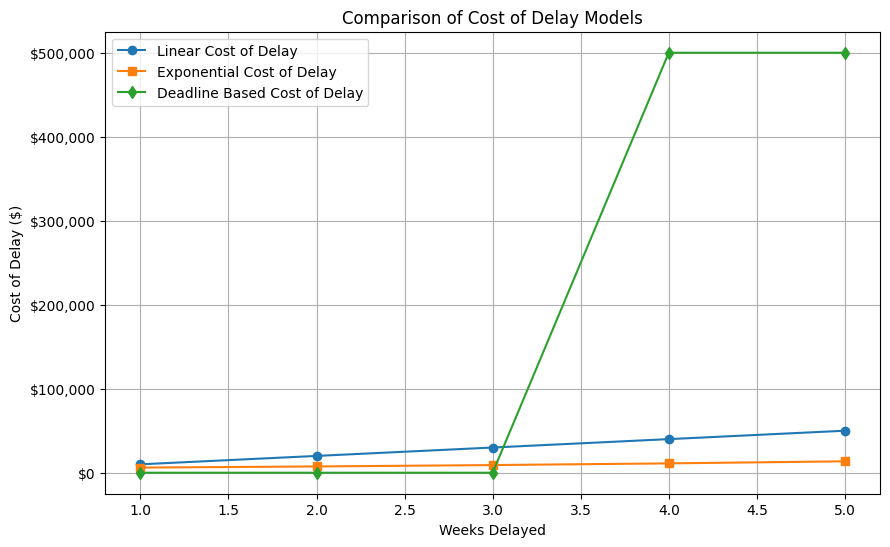

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Define cost of delay functions
def linear_cod(loss_per_week, weeks):
    return loss_per_week * weeks

def exponential_cod(initial_loss, growth_rate, weeks):
    return initial_loss * np.exp(growth_rate * weeks)

def deadline_based_cod(deadline, fine, weeks):
    return np.where(weeks < deadline, 0, fine)

# Parameters
weeks_range = np.arange(1, 6, 1)  # Weeks delayed

# Linear Model (constant loss per week)
linear_loss_per_week = 10000

# Exponential Model (compounding loss)
L0 = 5000  # Initial loss per week
k = 0.2    # Growth rate

# Deadline Based Model (Penalty after deadline)
deadline = 4  # Critical deadline week
fine = 500000  # Fine if past the deadline

# Compute cost of delay for different models
linear_costs = linear_cod(linear_loss_per_week, weeks_range)
exp_costs = exponential_cod(L0, k, weeks_range)
deadline_costs = deadline_based_cod(deadline, fine, weeks_range)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(weeks_range, linear_costs, label="Linear Cost of Delay", marker="o")
plt.plot(weeks_range, exp_costs, label="Exponential Cost of Delay", marker="s")
plt.plot(weeks_range, deadline_costs, label="Deadline Based Cost of Delay", marker="d")

# Formatting the y-axis with $ and comma separator
ax = plt.gca()  # Get current axis
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'${x:,.0f}'))  # Format as $ with commas

plt.xlabel("Weeks Delayed")
plt.ylabel("Cost of Delay ($)")
plt.title("Comparison of Cost of Delay Models")
plt.legend()
plt.grid(True)
plt.show()

# Prioritizing Work with Weighted Shortest Job First (WSJF)

## What is WSJF?
**WSJF** is a decision-making method that helps prioritize tasks by balancing **CoD** with **Job Duration**.  
The formula is:

$$ WSJF = \frac{\text{Cost of Delay}}{\text{Job Duration}} $$

### Why Does This Matter?
If two tasks have the **same CoD**, we should complete the **shorter one first**, because it delivers value **faster**.  
If a long and short job have **different CoDs**, WSJF **balances urgency vs. effort**.

---
## **Example: Prioritizing Loan Approvals in a Credit Union**

Imagine a **credit union** needs to process three types of loan applications. Each type has a different **Cost of Delay** (lost revenue per week) and takes a different amount of time to process.

| **Loan Type**       | **Cost of Delay ($/week)** | **Processing Time (weeks)** | **WSJF Score** |
|---------------------|-------------------------|---------------------------|---------------|
| **Mortgage Loan**   | \$200,000               | 8 weeks                   | ?             |
| **Auto Loan**       | \$50,000                | 2 weeks                   | ?             |
| **Personal Loan**   | \$20,000                | 1 week                    | ?             |

We will calculate WSJF for each loan type and determine **which should be processed first.**


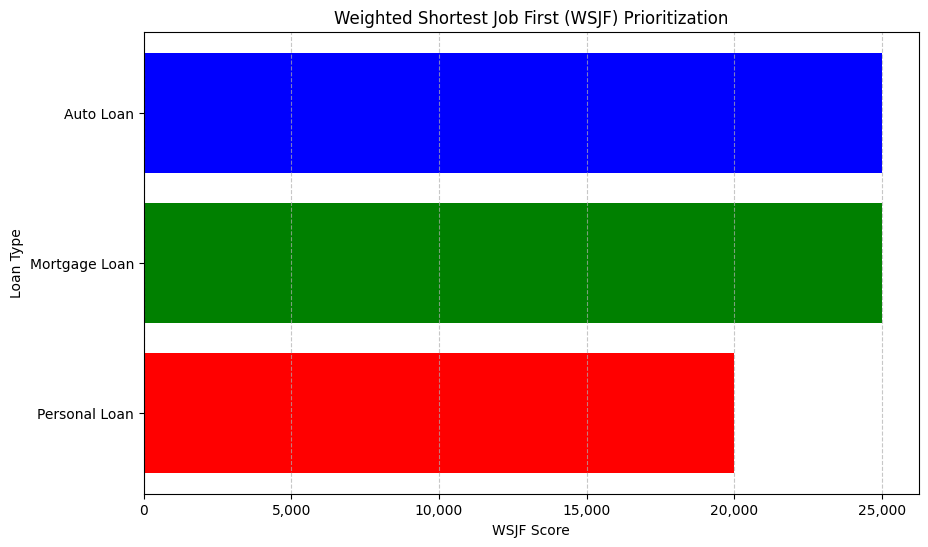

WSJF Prioritization Table:


,Cost of Delay ($/week),Processing Time (weeks),WSJF Score
Loan Type,,,
Auto Loan,"$50,000",2,"$25,000"
Mortgage Loan,"$200,000",8,"$25,000"
Personal Loan,"$20,000",1,"$20,000"


In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# Define WSJF calculation function
def calculate_wsjf(cost_of_delay, duration):
    return cost_of_delay / duration

# Define loan types, CoD per week, and processing durations
loan_types = ["Mortgage Loan", "Auto Loan", "Personal Loan"]
cost_of_delay = np.array([200000, 50000, 20000])  # Lost revenue per week ($)
processing_time = np.array([8, 2, 1])  # Processing time in weeks

# Calculate WSJF scores
wsjf_scores = calculate_wsjf(cost_of_delay, processing_time)

# Create a DataFrame to display results
wsjf_df = pd.DataFrame({
    "Loan Type": loan_types,
    "Cost of Delay ($/week)": cost_of_delay,
    "Processing Time (weeks)": processing_time,
    "WSJF Score": wsjf_scores
})

# Sort by WSJF Score (highest first), then by Processing Time (lowest first)
wsjf_df = wsjf_df.sort_values(by=["WSJF Score", "Processing Time (weeks)"], ascending=[False, True])

# Plot WSJF results
plt.figure(figsize=(10, 6))
plt.barh(wsjf_df["Loan Type"], wsjf_df["WSJF Score"], color=['blue', 'green', 'red'])
plt.xlabel("WSJF Score")
plt.ylabel("Loan Type")
plt.title("Weighted Shortest Job First (WSJF) Prioritization")

# Format x-axis with comma separator
ax = plt.gca()
ax.xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))

plt.gca().invert_yaxis()  # Invert y-axis for ranking clarity
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# Formatting the WSJF DataFrame to remove index and format currency properly
wsjf_df["Cost of Delay ($/week)"] = wsjf_df["Cost of Delay ($/week)"].apply(lambda x: f"${x:,.0f}")
wsjf_df["WSJF Score"] = wsjf_df["WSJF Score"].apply(lambda x: f"${x:,.0f}")

# Reset index to remove numbered rows
wsjf_df.index = wsjf_df["Loan Type"]  # Set Loan Type as index
wsjf_df = wsjf_df.drop(columns=["Loan Type"])  # Remove duplicate Loan Type column

# Display formatted table
from IPython.display import display

print("WSJF Prioritization Table:")
display(wsjf_df)


# Insights & Key Takeaways

## What This Analysis Shows
This project demonstrates how **WSJF** helps prioritize tasks based on **economic impact and execution time**.  
By applying WSJF to loan approvals in a credit union, we see that:

- **Auto Loans should be processed first** because they have the same CoD as Mortgage Loans but a **shorter duration**.
- **Mortgage Loans come second** as they generate high revenue but take longer.
- **Personal Loans are the lowest priority** since they have the lowest CoD.

## Practical Applications
- **Financial Institutions**: Prioritize loan approvals to **maximize revenue**.  
- **Product Development**: Prioritize features based on **economic value**.  
- **Project Management**: Focus on the **highest ROI tasks first**.
